#Introduction

My final project for my Data Analytics course will focus on Emergency Room visits in Denmark. Emergency Room visits are well known to be a significant area of cost for the healthcare system. Denmark has a universal health care system, where care is paid for through tax revenue.

My dataset comes from the Danish Statisk Bank. This is a collection of datasets that the government releases to the public. My specific dataset covers all of Denmark (all of the health regions) and is for the years 2006-2018, which was the most current years available.

For my first step, I will get a sense of my dataset, do some cleaning, and then find out the most common reasons patients are seeking care from Emergency Rooms.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Allison/ER_Visits_Region.06-18.xlsx'
df = pd.read_excel(path)
df


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Gender,Age,Region,Disease,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Men,0 years,Region Hovedstaden,01 Infectious diseases,12,14,12,6,5,3,5,6,782,665,692,490,591
1,Men,0 years,Region Hovedstaden,02 Diseases of lung,20,13,20,15,15,8,15,7,364,272,280,242,208
2,Men,0 years,Region Hovedstaden,03 Diseases of the nervous system,3,..,3,4,..,..,4,..,26,27,14,30,33
3,Men,0 years,Region Hovedstaden,04 Diseases of the heart and great vessels,0,3,..,0,..,0,..,..,6,6,3,4,3
4,Men,0 years,Region Hovedstaden,"05 Diseases of arteries, veins, lymph",0,0,0,..,..,..,..,0,5,7,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,Women,85 years and over,Region Nordjylland,20 Concussion,15,12,9,12,16,20,8,20,20,26,33,37,49
4556,Women,85 years and over,Region Nordjylland,21 Poisonings,..,0,4,..,..,0,..,..,5,10,3,6,5
4557,Women,85 years and over,Region Nordjylland,22 Live-born children,0,0,0,0,0,0,0,0,0,0,0,0,0
4558,Women,85 years and over,Region Nordjylland,23 Other diseases,524,569,741,843,895,866,932,1011,987,1201,1460,1477,1689


#Data Cleaning

Due to the irregularity in the data from 2006-2013, I will subset the data and use only information from 2014-2018.


In [ ]:
df = df[['Gender',	'Age',	'Region',	'Disease', '2014',	'2015',	'2016',	'2017',	'2018']]
df

,Gender,Age,Region,Disease,2014,2015,2016,2017,2018
0,Men,0 years,Region Hovedstaden,01 Infectious diseases,782,665,692,490,591
1,Men,0 years,Region Hovedstaden,02 Diseases of lung,364,272,280,242,208
2,Men,0 years,Region Hovedstaden,03 Diseases of the nervous system,26,27,14,30,33
3,Men,0 years,Region Hovedstaden,04 Diseases of the heart and great vessels,6,6,3,4,3
4,Men,0 years,Region Hovedstaden,"05 Diseases of arteries, veins, lymph",5,7,3,4,3
...,...,...,...,...,...,...,...,...,...
4555,Women,85 years and over,Region Nordjylland,20 Concussion,20,26,33,37,49
4556,Women,85 years and over,Region Nordjylland,21 Poisonings,5,10,3,6,5
4557,Women,85 years and over,Region Nordjylland,22 Live-born children,0,0,0,0,0
4558,Women,85 years and over,Region Nordjylland,23 Other diseases,987,1201,1460,1477,1689


I will learn more about my dataframe subset.

In [ ]:
df.columns

Index(['Gender', 'Age', 'Region', 'Disease', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of      Gender                Age              Region  \
0       Men            0 years  Region Hovedstaden   
1       Men            0 years  Region Hovedstaden   
2       Men            0 years  Region Hovedstaden   
3       Men            0 years  Region Hovedstaden   
4       Men            0 years  Region Hovedstaden   
...     ...                ...                 ...   
4555  Women  85 years and over  Region Nordjylland   
4556  Women  85 years and over  Region Nordjylland   
4557  Women  85 years and over  Region Nordjylland   
4558  Women  85 years and over  Region Nordjylland   
4559  Women  85 years and over  Region Nordjylland   

                                         Disease 2014  2015  2016  2017  2018  
0                         01 Infectious diseases  782   665   692   490   591  
1                            02 Diseases of lung  364   272   280   242   208  
2              03 Diseases of the nervous system   26    27    14    30    33  

In this dataset, null values are labeled as "..". I will change them to NaN so that I can work with them more easily.


In [ ]:
df.replace('..', np.nan, inplace = True)

<ipython-input-7-5c12873618de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('..', np.nan, inplace = True)


Now I will check to ensure the null values have been changed.

In [ ]:
df.iloc[[25]]

,Gender,Age,Region,Disease,2014,2015,2016,2017,2018
25,Men,0 years,Region Sjælland,02 Diseases of lung,6.0,4.0,3.0,NaN,5.0


I will now see how many null values are in the dataset.


In [ ]:
df.isnull().sum()

Gender       0
Age          0
Region       0
Disease      0
2014       244
2015       219
2016       223
2017       196
2018       203
dtype: int64

Next, I will replace the null values by creating a function that will replace them with the mean of the row values.

In [ ]:
def fillna_mean(df,cols):
  df[cols] = df[cols].apply(lambda row: row.fillna(row.mean()), axis = 1)
  return df

df = fillna_mean(df, ['2014', '2015', '2016', '2017','2018'])
df

<ipython-input-9-a9832baa897c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].apply(lambda row: row.fillna(row.mean()), axis = 1)


,Gender,Age,Region,Disease,2014,2015,2016,2017,2018
0,Men,0 years,Region Hovedstaden,01 Infectious diseases,782.0,665.0,692.0,490.0,591.0
1,Men,0 years,Region Hovedstaden,02 Diseases of lung,364.0,272.0,280.0,242.0,208.0
2,Men,0 years,Region Hovedstaden,03 Diseases of the nervous system,26.0,27.0,14.0,30.0,33.0
3,Men,0 years,Region Hovedstaden,04 Diseases of the heart and great vessels,6.0,6.0,3.0,4.0,3.0
4,Men,0 years,Region Hovedstaden,"05 Diseases of arteries, veins, lymph",5.0,7.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
4555,Women,85 years and over,Region Nordjylland,20 Concussion,20.0,26.0,33.0,37.0,49.0
4556,Women,85 years and over,Region Nordjylland,21 Poisonings,5.0,10.0,3.0,6.0,5.0
4557,Women,85 years and over,Region Nordjylland,22 Live-born children,0.0,0.0,0.0,0.0,0.0
4558,Women,85 years and over,Region Nordjylland,23 Other diseases,987.0,1201.0,1460.0,1477.0,1689.0


Now I will check to enure the values have been changed correctly

In [ ]:
df.iloc[[25]]

,Gender,Age,Region,Disease,2014,2015,2016,2017,2018
25,Men,0 years,Region Sjælland,02 Diseases of lung,6.0,4.0,3.0,4.5,5.0


In [ ]:
df.head(15)

,Gender,Age,Region,Disease,2014,2015,2016,2017,2018
0,Men,0 years,Region Hovedstaden,01 Infectious diseases,782.0,665.0,692.0,490.0,591.00
1,Men,0 years,Region Hovedstaden,02 Diseases of lung,364.0,272.0,280.0,242.0,208.00
2,Men,0 years,Region Hovedstaden,03 Diseases of the nervous system,26.0,27.0,14.0,30.0,33.00
3,Men,0 years,Region Hovedstaden,04 Diseases of the heart and great vessels,6.0,6.0,3.0,4.0,3.00
4,Men,0 years,Region Hovedstaden,"05 Diseases of arteries, veins, lymph",5.0,7.0,3.0,4.0,3.00
5,Men,0 years,Region Hovedstaden,06 Varicose veins in leg,0.0,0.0,0.0,0.0,0.00
6,Men,0 years,Region Hovedstaden,07 Diseases of blood and lymphatic tissue,8.0,0.0,0.0,3.0,2.75
7,Men,0 years,Region Hovedstaden,08 Diseases of the stomach and intestines,385.0,518.0,461.0,398.0,441.00
8,Men,0 years,Region Hovedstaden,09 Diseases of the urinary tract,50.0,74.0,72.0,76.0,52.00
9,Men,0 years,Region Hovedstaden,10 Diseases of the musculoskeletal system,176.0,170.0,162.0,204.0,211.00


I will now save this data frame for analysis and visualization.

In [ ]:
df.to_csv('2014-2018_ER_visits')

NameError: ignored

#Data Analysis and Visualization

First, I want to learn the most common reason why people go to the emergency room. I will find the total number of cases across all ages for each disease. Here I am adding all of the values by disease, and then I created a new column, "Total", with the total values.

In [ ]:
df = pd.read_csv('/content/2014-2018_ER_visits')

df1 = df.groupby("Disease")['2014', '2015', '2016', '2017','2018'].sum().reset_index()
df1['Total']=df1.sum(axis = 1)
df1

Now, I want to order this list so I can see the diseases with the highest values.

In [ ]:
highest_values = df1['Total'].sort_values(ascending = False)
highest_values

9     2.527634e+06
22    1.311423e+06
14    3.004353e+05
7     2.662740e+05
1     2.486695e+05
12    1.717835e+05
13    1.709472e+05
0     1.701470e+05
8     1.638832e+05
2     1.031165e+05
3     8.073600e+04
16    5.415642e+04
15    4.302467e+04
19    4.198900e+04
20    3.685675e+04
11    3.597883e+04
4     2.596225e+04
10    1.669533e+04
6     1.383933e+04
21    6.191917e+03
17    1.646500e+03
5     8.755000e+02
18    0.000000e+00
23    0.000000e+00
Name: Total, dtype: float64

Now I will take the top five diseases and visualize them using a bar chart.

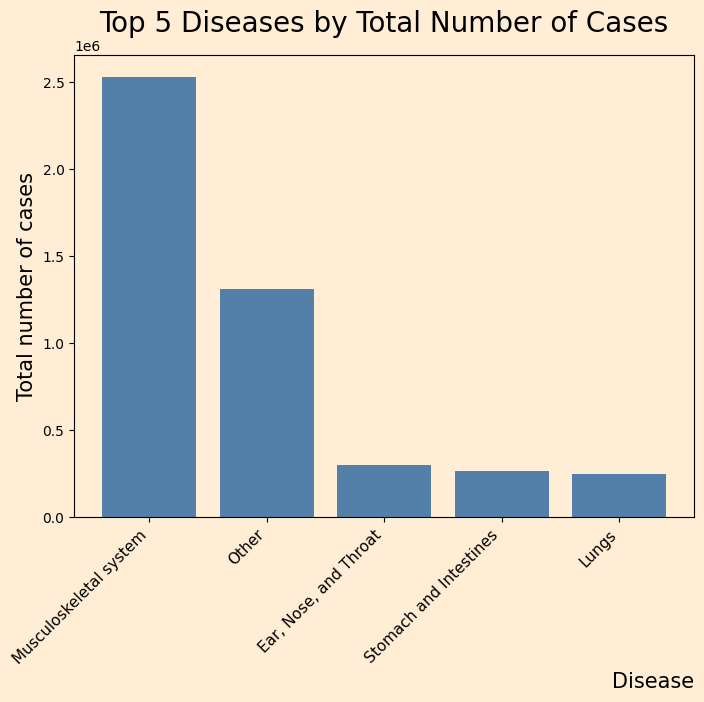

In [ ]:
color = '#5380A8'
plt.figure(figsize = (8,6), facecolor = '#FFEED5')
ax = plt.axes()
ax.set_facecolor('#FFEED5')
top_diseases = highest_values.nlargest(5)
disease_names = ('Musculoskeletal system', 'Other', 'Ear, Nose, and Throat', 'Stomach and Intestines', 'Lungs' )
plt.bar(disease_names, top_diseases, color = color, align = 'center')
plt.xlabel('Disease', fontsize = 15, loc = 'right')


plt.ylabel('Total number of cases', fontsize = 15)
plt.title('Top 5 Diseases by Total Number of Cases', fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45, ha = 'right')
plt.savefig('A_Top_Disease_BarChart.jpg', bbox_inches = 'tight')
plt.show()


Here I can see that "Diseases of the musculoskeletal system" have the highest value. I would like to learn more about these cases. First, I will make a subset of the original dataframe with data only for the "Diseases of the musculoskeletal system".

In [ ]:
musc_skel = df[df['Disease'] == '10 Diseases of the musculoskeletal system']


In [ ]:
musc_skel.reset_index(drop = True, inplace = True)
musc_skel

,Unnamed: 0,Gender,Age,Region,Disease,2014,2015,2016,2017,2018
0,9,Men,0 years,Region Hovedstaden,10 Diseases of the musculoskeletal system,176.0,170.0,162.0,204.0,211.0
1,33,Men,0 years,Region Sjælland,10 Diseases of the musculoskeletal system,25.0,33.0,43.0,30.0,47.0
2,57,Men,0 years,Region Syddanmark,10 Diseases of the musculoskeletal system,69.0,48.0,62.0,50.0,59.0
3,81,Men,0 years,Region Midtjylland,10 Diseases of the musculoskeletal system,27.0,26.0,29.0,23.0,26.0
4,105,Men,0 years,Region Nordjylland,10 Diseases of the musculoskeletal system,9.0,11.0,12.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...
185,4449,Women,85 years and over,Region Hovedstaden,10 Diseases of the musculoskeletal system,5403.0,5283.0,5069.0,5244.0,5789.0
186,4473,Women,85 years and over,Region Sjælland,10 Diseases of the musculoskeletal system,1741.0,1623.0,1707.0,1816.0,2069.0
187,4497,Women,85 years and over,Region Syddanmark,10 Diseases of the musculoskeletal system,3650.0,3374.0,3381.0,3213.0,3054.0
188,4521,Women,85 years and over,Region Midtjylland,10 Diseases of the musculoskeletal system,2534.0,2510.0,2406.0,2306.0,2433.0


Now I want to see how these cases are divided by gender. I will group by "Gender" and then I will create a column called "Total" with the total value.

In [ ]:
grouped_gender = musc_skel.groupby('Gender')['2014','2015', '2016', '2017', '2018'].sum().reset_index()
grouped_gender


<ipython-input-34-33e56be2e5d1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_gender = musc_skel.groupby('Gender')['2014','2015', '2016', '2017', '2018'].sum().reset_index()


,Gender,2014,2015,2016,2017,2018
0,Men,277184.0,266242.0,264342.0,264413.0,266258.0
1,Women,242422.0,236896.0,235097.0,236139.0,238641.0


In [ ]:
grouped_gender['Total'] = grouped_gender['2014'] + grouped_gender['2015'] + grouped_gender['2016'] + grouped_gender['2017'] + grouped_gender['2018']
grouped_gender

,Gender,2014,2015,2016,2017,2018,Total
0,Men,277184.0,266242.0,264342.0,264413.0,266258.0,1338439.0
1,Women,242422.0,236896.0,235097.0,236139.0,238641.0,1189195.0


In [ ]:
grouped_gender['Percentage'] = grouped_gender['Total']/grouped_gender['Total'].sum()*100
grouped_gender

,Gender,2014,2015,2016,2017,2018,Total,Percentage
0,Men,277184.0,266242.0,264342.0,264413.0,266258.0,1338439.0,52.952247
1,Women,242422.0,236896.0,235097.0,236139.0,238641.0,1189195.0,47.047753


Now that I have both the totals and percentages of cases by gender, I will create a pie chart to visualize this in a clear way.

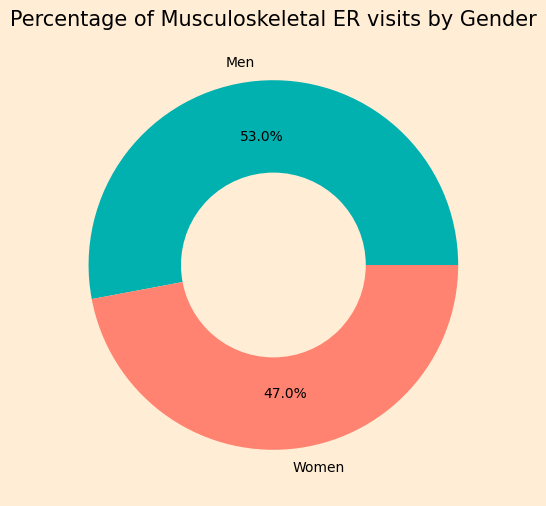

In [ ]:
colors = ['#00B1B0', '#FF8370']

plt.figure(figsize = (8,6), facecolor = '#FFEED5')
plt.pie(grouped_gender['Percentage'], colors = colors, labels = grouped_gender['Gender'], autopct = '%1.1f%%', pctdistance=0.70)
plt.title('Percentage of Musculoskeletal ER visits by Gender', fontsize = 15)

center_circle= plt.Circle((0,0), 0.50, fc = '#FFEED5')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
plt.savefig('A_Gender_PieChart.jpg', bbox_inches = 'tight')
plt.show()


Now I want to see what the totals are by year in the various health regions.

In [ ]:
reg_totals = musc_skel.groupby('Region')['2014','2015', '2016', '2017', '2018'].sum().reset_index()
reg_totals.head(1)
reg_totals.columns

<ipython-input-42-16305792ae31>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reg_totals = musc_skel.groupby('Region')['2014','2015', '2016', '2017', '2018'].sum().reset_index()


Index(['Region', '2014', '2015', '2016', '2017', '2018'], dtype='object')

In [ ]:
reg_totals['Region'] = reg_totals['Region'].astype('category')
reg_totals

,Region,2014,2015,2016,2017,2018
0,Region Hovedstaden,191076.0,187140.0,187157.0,190008.0,197424.0
1,Region Midtjylland,82050.0,77831.0,77798.0,75947.0,76159.0
2,Region Nordjylland,37544.0,36483.0,35861.0,37388.0,37531.0
3,Region Sjælland,82586.0,82986.0,82948.0,83157.0,84829.0
4,Region Syddanmark,126350.0,118698.0,115675.0,114052.0,108956.0


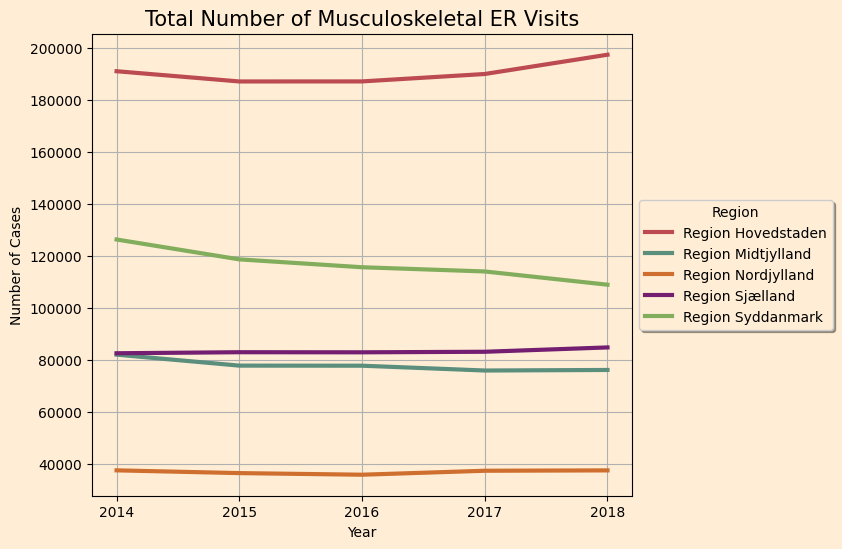

In [ ]:
reg_H = reg_totals[reg_totals['Region'] =='Region Hovedstaden']
reg_M = reg_totals[reg_totals['Region'] =='Region Midtjylland']
reg_N = reg_totals[reg_totals['Region'] =='Region Nordjylland']
reg_SJ = reg_totals[reg_totals['Region'] =='Region Sjælland']
reg_SY = reg_totals[reg_totals['Region'] =='Region Syddanmark']

plt.figure(figsize = (8,6), facecolor = '#FFEED5')
ax = plt.axes()
ax.set_facecolor('#FFEED5')
plt.grid(True)
plt.plot(reg_H.columns[1:], reg_H.iloc[0, 1:], color = '#BC4B51', linewidth = 3, label = 'Region Hovedstaden')
plt.plot(reg_M.columns[1:], reg_M.iloc[0, 1:], color = '#5B8E7D', linewidth = 3, label = 'Region Midtjylland')
plt.plot(reg_N.columns[1:], reg_N.iloc[0, 1:], color = '#CF6F2F', linewidth = 3, label = 'Region Nordjylland')
plt.plot(reg_SJ.columns[1:], reg_SJ.iloc[0, 1:], color = '#741E71', linewidth = 3, label = 'Region Sjælland')
plt.plot(reg_SY.columns[1:], reg_SY.iloc[0, 1:], color = '#82AD5C', linewidth = 3, label = 'Region Syddanmark')

 #['2014', "2015", "2016", "2017", "2018"], data = reg_totals, color ="r")
#reg_totals.loc[reg_totals['Region'] =='Region Midtjylland', '2014':'2018'].T.plot(kind = 'line', color = 'b')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Region', fancybox=True, shadow=True, facecolor = '#FFEED5')
plt.subplots_adjust(right=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Total Number of Musculoskeletal ER Visits', fontsize = 15)
plt.savefig('A_Total_by_Region_LineChart.jpg', bbox_inches = 'tight')
plt.show()


This shows clearly that Region Hovedstaden has the most cases. However, I also know that this region has the highest population. I would like to know the rate of cases per 100,000 residents to see if the incident rate is also highest in Region Hovedstaden.

I will use a population dataset that will show the total populations by region for the years 2014-2018.

In [ ]:
pop_df= pd.read_excel('/content/drive/MyDrive/ReDI Final Project/DK_Pop_2014-2018.xlsx')
pop_df
pop_df.head(5)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,"Population at the first day of the quarter by sex, region and time",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Units: Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2014Q1,2014Q2,2014Q3,2014Q4,Total 2014,2015Q1,2015Q2,2015Q3,...,2017Q1,2017Q2,2017Q3,2017Q4,Total 2017,2018Q1,2018Q2,2018Q3,2018Q4,Total 2018
2,NaN,Region Hovedstaden,1749405,1753976,1756068,1766677,7026126,1768125,1772912,1775479,...,1807404,1811809,1812168,1821577,7252958,1822659,1826010,1825952,1835537,7310158
3,NaN,Region Sjælland,816726,817429,818733,819385,3272273,820480,821366,824199,...,832553,832703,833997,834740,3333993,835024,835107,836379,836694,3343204
4,NaN,Region Syddanmark,1202509,1203077,1204111,1205025,4814722,1205728,1206924,1208520,...,1217224,1218010,1218665,1220306,4874205,1220763,1221083,1222370,1223204,4887420


I only need the total population columns for each year per region, so I will subset the data to make a new dataset with the relevant data.

In [ ]:
new_pop = pop_df[['Unnamed: 1','Unnamed: 6', 'Unnamed: 11', 'Unnamed: 16', 'Unnamed: 21', 'Unnamed: 26' ]]
new_pop

,Unnamed: 1,Unnamed: 6,Unnamed: 11,Unnamed: 16,Unnamed: 21,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Total 2014,Total 2015,Total 2016,Total 2017,Total 2018
2,Region Hovedstaden,7026126,7102985,7184123,7252958,7310158
3,Region Sjælland,3272273,3291938,3318546,3333993,3343204
4,Region Syddanmark,4814722,4831469,4857257,4874205,4887420
5,Region Midtjylland,5118095,5145949,5189528,5231693,5265432
6,Region Nordjylland,2325925,2333685,2344793,2351354,2356812


In [ ]:
new_pop.set_axis(['Region', 'Total 2014',	'Total 2015',	'Total 2016',	'Total 2017',	'Total 2018'], axis = 'columns', inplace = True)
new_pop

<ipython-input-7-0e33a43c994a>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  new_pop.set_axis(['Region', 'Total 2014',	'Total 2015',	'Total 2016',	'Total 2017',	'Total 2018'], axis = 'columns', inplace = True)


,Region,Total 2014,Total 2015,Total 2016,Total 2017,Total 2018
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Total 2014,Total 2015,Total 2016,Total 2017,Total 2018
2,Region Hovedstaden,7026126,7102985,7184123,7252958,7310158
3,Region Sjælland,3272273,3291938,3318546,3333993,3343204
4,Region Syddanmark,4814722,4831469,4857257,4874205,4887420
5,Region Midtjylland,5118095,5145949,5189528,5231693,5265432
6,Region Nordjylland,2325925,2333685,2344793,2351354,2356812


In [ ]:
new_pop.drop([0,1], axis = 0, inplace = True)
new_pop.reset_index(inplace = True)
new_pop

<ipython-input-8-153b694ee24e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pop.drop([0,1], axis = 0, inplace = True)


,index,Region,Total 2014,Total 2015,Total 2016,Total 2017,Total 2018
0,2,Region Hovedstaden,7026126,7102985,7184123,7252958,7310158
1,3,Region Sjælland,3272273,3291938,3318546,3333993,3343204
2,4,Region Syddanmark,4814722,4831469,4857257,4874205,4887420
3,5,Region Midtjylland,5118095,5145949,5189528,5231693,5265432
4,6,Region Nordjylland,2325925,2333685,2344793,2351354,2356812


In [ ]:
new_pop.drop(['index'], axis = 'columns', inplace = True)
#new_pop.drop(['level_0'], axis = 'columns', inplace = True)
new_pop

<ipython-input-9-699b3b2fea98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pop.drop(['index'], axis = 'columns', inplace = True)


,Region,Total 2014,Total 2015,Total 2016,Total 2017,Total 2018
0,Region Hovedstaden,7026126,7102985,7184123,7252958,7310158
1,Region Sjælland,3272273,3291938,3318546,3333993,3343204
2,Region Syddanmark,4814722,4831469,4857257,4874205,4887420
3,Region Midtjylland,5118095,5145949,5189528,5231693,5265432
4,Region Nordjylland,2325925,2333685,2344793,2351354,2356812


In [ ]:
new_pop.to_csv('DK_pop_totals')

I will now merge my population dataset with my dataset of cases by region so that I can calculate the various rates.

In [ ]:
rate_df = pd.merge(reg_totals, new_pop)
rate_df

,Region,2014,2015,2016,2017,2018,Total 2014,Total 2015,Total 2016,Total 2017,Total 2018
0,Region Hovedstaden,191076.0,187140.0,187157.0,190008.0,197424.0,7026126,7102985,7184123,7252958,7310158
1,Region Midtjylland,82050.0,77831.0,77798.0,75947.0,76159.0,5118095,5145949,5189528,5231693,5265432
2,Region Nordjylland,37544.0,36483.0,35861.0,37388.0,37531.0,2325925,2333685,2344793,2351354,2356812
3,Region Sjælland,82586.0,82986.0,82948.0,83157.0,84829.0,3272273,3291938,3318546,3333993,3343204
4,Region Syddanmark,126350.0,118698.0,115675.0,114052.0,108956.0,4814722,4831469,4857257,4874205,4887420


In order to find the incident rate (per 100,000 residents), I will divide the case total by the population total and then multiply that by 100,000. I will do this for each year from 2014-2018.

In [ ]:
rate_df['Case_Rate_2014'] = (rate_df['2014']/rate_df['Total 2014']) * 100000
rate_df['Case_Rate_2015'] = (rate_df['2015']/rate_df['Total 2015']) * 100000
rate_df['Case_Rate_2016'] = (rate_df['2016']/rate_df['Total 2016']) * 100000
rate_df['Case_Rate_2017'] = (rate_df['2017']/rate_df['Total 2017']) * 100000
rate_df['Case_Rate_2018'] = (rate_df['2018']/rate_df['Total 2018']) * 100000
rate_df

,Region,2014,2015,2016,2017,2018,Total 2014,Total 2015,Total 2016,Total 2017,Total 2018,Case_Rate_2014,Case_Rate_2015,Case_Rate_2016,Case_Rate_2017,Case_Rate_2018
0,Region Hovedstaden,191076.0,187140.0,187157.0,190008.0,197424.0,7026126,7102985,7184123,7252958,7310158,2719.507165,2634.666975,2605.14749,2619.73115,2700.680341
1,Region Midtjylland,82050.0,77831.0,77798.0,75947.0,76159.0,5118095,5145949,5189528,5231693,5265432,1603.135542,1512.471266,1499.134411,1451.671572,1446.396041
2,Region Nordjylland,37544.0,36483.0,35861.0,37388.0,37531.0,2325925,2333685,2344793,2351354,2356812,1614.153509,1563.321528,1529.388735,1590.062577,1592.447764
3,Region Sjælland,82586.0,82986.0,82948.0,83157.0,84829.0,3272273,3291938,3318546,3333993,3343204,2523.81143,2520.885873,2499.528408,2494.216395,2537.35638
4,Region Syddanmark,126350.0,118698.0,115675.0,114052.0,108956.0,4814722,4831469,4857257,4874205,4887420,2624.242895,2456.768324,2381.488153,2339.90979,2229.315262


Now I will visualize this rate data.

In [ ]:
r_df = pd.DataFrame(rate_df, columns = ['Region', 'Case_Rate_2014',	'Case_Rate_2015',	'Case_Rate_2016',	'Case_Rate_2017',	'Case_Rate_2018'])
r_df.set_axis['Region']

In [ ]:
r_df['Region'] = r_df['Region'].astype('category')
r_df

,Region,Case_Rate_2014,Case_Rate_2015,Case_Rate_2016,Case_Rate_2017,Case_Rate_2018
0,Region Hovedstaden,2719.507165,2634.666975,2605.14749,2619.73115,2700.680341
1,Region Midtjylland,1603.135542,1512.471266,1499.134411,1451.671572,1446.396041
2,Region Nordjylland,1614.153509,1563.321528,1529.388735,1590.062577,1592.447764
3,Region Sjælland,2523.81143,2520.885873,2499.528408,2494.216395,2537.35638
4,Region Syddanmark,2624.242895,2456.768324,2381.488153,2339.90979,2229.315262


In [ ]:
r_df.set_axis(['Region', '2014', '2015', '2016', '2017', '2018'], axis = 'columns', inplace = True)
r_df

<ipython-input-65-9a2ff9dc07dc>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  r_df.set_axis(['Region', '2014', '2015', '2016', '2017', '2018'], axis = 'columns', inplace = True)


,Region,2014,2015,2016,2017,2018
0,Region Hovedstaden,2719.507165,2634.666975,2605.14749,2619.73115,2700.680341
1,Region Midtjylland,1603.135542,1512.471266,1499.134411,1451.671572,1446.396041
2,Region Nordjylland,1614.153509,1563.321528,1529.388735,1590.062577,1592.447764
3,Region Sjælland,2523.81143,2520.885873,2499.528408,2494.216395,2537.35638
4,Region Syddanmark,2624.242895,2456.768324,2381.488153,2339.90979,2229.315262


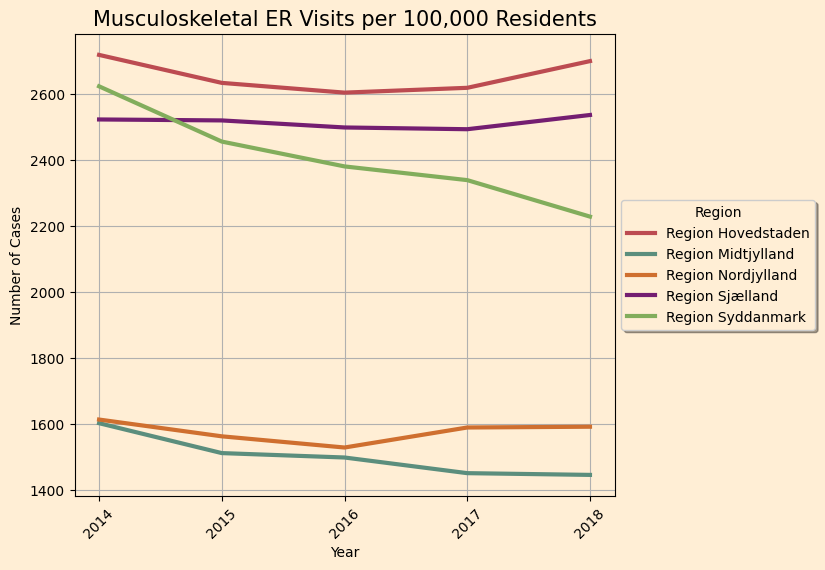

In [ ]:
reg_H = r_df[r_df['Region'] =='Region Hovedstaden']
reg_M = r_df[r_df['Region'] =='Region Midtjylland']
reg_N = r_df[r_df['Region'] =='Region Nordjylland']
reg_SJ = r_df[r_df['Region'] =='Region Sjælland']
reg_SY = r_df[r_df['Region'] =='Region Syddanmark']

plt.figure(figsize = (8,6), facecolor = '#FFEED5')
ax = plt.axes()
ax.set_facecolor('#FFEED5')

plt.grid(True)
plt.plot(reg_H.columns[1:], reg_H.iloc[0, 1:], color = '#BC4B51', linewidth = 3, label = 'Region Hovedstaden')
plt.plot(reg_M.columns[1:], reg_M.iloc[0, 1:], color = '#5B8E7D', linewidth = 3, label = 'Region Midtjylland')
plt.plot(reg_N.columns[1:], reg_N.iloc[0, 1:], color = '#CF6F2F', linewidth = 3, label = 'Region Nordjylland')
plt.plot(reg_SJ.columns[1:], reg_SJ.iloc[0, 1:], color = '#741E71', linewidth = 3, label = 'Region Sjælland')
plt.plot(reg_SY.columns[1:], reg_SY.iloc[0, 1:], color = '#82AD5C', linewidth = 3, label = 'Region Syddanmark')

 #['2014', "2015", "2016", "2017", "2018"], data = reg_totals, color ="r")
#reg_totals.loc[reg_totals['Region'] =='Region Midtjylland', '2014':'2018'].T.plot(kind = 'line', color = 'b')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Region', fancybox=True, shadow=True, facecolor = '#FFEED5')
plt.subplots_adjust(right=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Musculoskeletal ER Visits per 100,000 Residents', fontsize = 15)
plt.xticks(rotation = 45)
plt.savefig('A_Rate_by_Region_LineChart.jpg', bbox_inches = 'tight')
plt.show()

Here we can see that while Region Hovedstaden has the most cases per 100,000, the difference between Region Sjælland and Region Syddanmark is much less.


I would now like to see the distribution of cases by age. I will group the data and then visualize it with a line plot and a boxplot to learn more.  

In [ ]:
grouped_age = musc_skel.groupby('Age')[['2014','2015', '2016', '2017', '2018']].median().reset_index()
grouped_age_fixed = grouped_age.reindex([0,1,10,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18])
grouped_age_fixed
#I don't know that this is what I want, because it won't give the min and max values now for the following chart. I also need to possibly bin the ages or just ensure the labels correctly match it's bar

,Age,2014,2015,2016,2017,2018
0,0 years,33.5,34.5,38.5,29.0,40.5
1,1-4 years,2175.0,2013.5,2016.5,2035.0,2033.5
10,5-9 years,3349.5,3283.5,3157.0,2999.5,2852.5
2,10-14 years,5483.0,5358.5,5262.5,5081.0,4810.5
3,15-19 years,5204.5,4872.0,4743.5,4623.5,4512.5
4,20-24 years,4400.0,4153.0,4090.0,4012.0,3891.5
5,25-29 years,2770.0,2794.0,2845.0,2907.5,2854.5
6,30-34 years,2191.0,2117.0,2154.5,2160.5,2189.5
7,35-39 years,2468.5,2173.5,2140.0,2103.0,1953.0
8,40-44 years,2603.0,2358.0,2325.5,2198.0,2021.0


In [ ]:
melted_musc_skel = musc_skel.copy()
melted_musc_skel['Year'] = pd.melt(melted_musc_skel, id_vars = ['Gender', 'Age', 'Region', 'Disease'], value_vars = ['2014', '2015', '2016', '2017', '2018'], var_name = 'Year')['value']
melted_musc_skel = melted_musc_skel.drop( columns = ['2014', '2015', '2016', '2017', '2018'])
melted_musc_skel

,Unnamed: 0,Gender,Age,Region,Disease,Year
0,9,Men,0 years,Region Hovedstaden,10 Diseases of the musculoskeletal system,176.0
1,33,Men,0 years,Region Sjælland,10 Diseases of the musculoskeletal system,25.0
2,57,Men,0 years,Region Syddanmark,10 Diseases of the musculoskeletal system,69.0
3,81,Men,0 years,Region Midtjylland,10 Diseases of the musculoskeletal system,27.0
4,105,Men,0 years,Region Nordjylland,10 Diseases of the musculoskeletal system,9.0
...,...,...,...,...,...,...
185,4449,Women,85 years and over,Region Hovedstaden,10 Diseases of the musculoskeletal system,5403.0
186,4473,Women,85 years and over,Region Sjælland,10 Diseases of the musculoskeletal system,1741.0
187,4497,Women,85 years and over,Region Syddanmark,10 Diseases of the musculoskeletal system,3650.0
188,4521,Women,85 years and over,Region Midtjylland,10 Diseases of the musculoskeletal system,2534.0


<ipython-input-78-6cb8437c6916>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  age_gender_linplot.set_xticklabels(age_gender_linplot.get_xticklabels(), rotation = 45, ha = 'right')


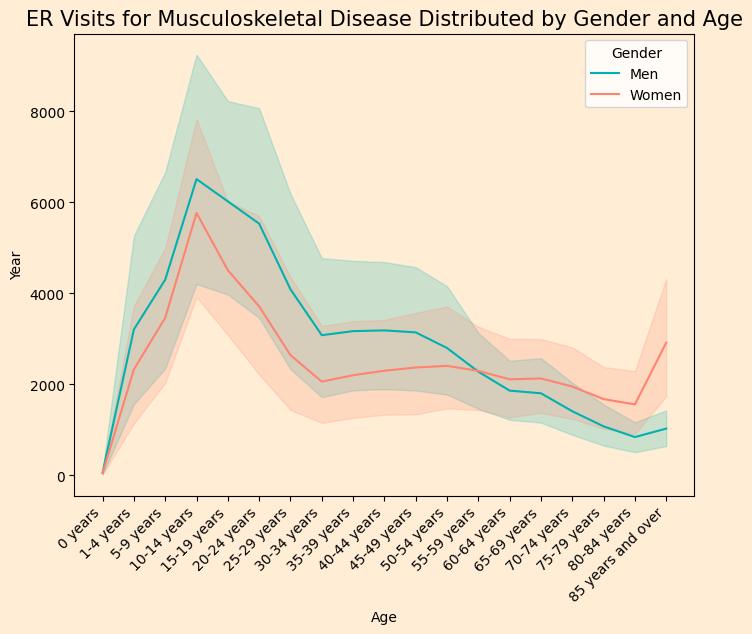

In [ ]:
plt.figure(figsize = (8,6), facecolor = '#FFEED5')
ax = plt.axes()
ax.set_facecolor('#FFEED5')

age_gender_linplot = sns.lineplot(x = 'Age', y = 'Year', data = melted_musc_skel, hue = 'Gender', palette = ['#00B1B0', '#FF8370'])
age_gender_linplot.set_xticklabels(age_gender_linplot.get_xticklabels(), rotation = 45, ha = 'right')
plt.title('ER Visits for Musculoskeletal Disease Distributed by Gender and Age', fontsize = 15)
plt.savefig('B_Gender_by_Age_LineChart.jpg', bbox_inches = 'tight')
plt.show()

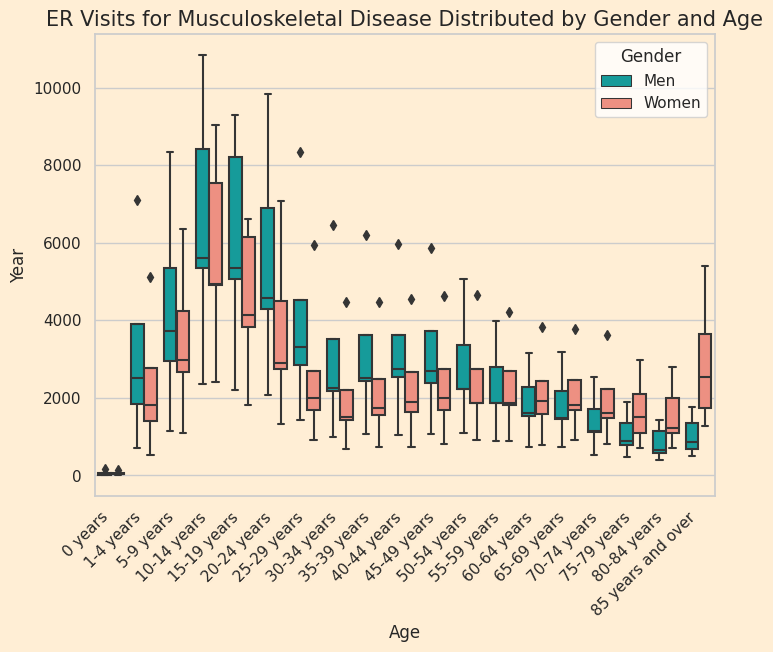

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (8,6), facecolor = '#FFEED5')
ax = plt.axes()
ax.set_facecolor('#FFEED5')


gender_boxplot = sns.boxplot(x = 'Age', y = 'Year', data = melted_musc_skel, hue = 'Gender', palette = ['#00B1B0', '#FF8370'])
gender_boxplot.set_xticklabels(gender_boxplot.get_xticklabels(), rotation = 45, ha = 'right')
plt.title('ER Visits for Musculoskeletal Disease Distributed by Gender and Age', fontsize = 15)
plt.savefig('B_Gender_Age_Boxplot.jpg', bbox_inches = 'tight')
plt.show()

In [ ]:
melted_musc_skel.describe()

,Year
count,190.000000
mean,2734.768421
std,2155.762655
min,6.000000
25%,1144.500000
50%,2178.500000
75%,3728.250000
max,10832.000000


##Hypothesis Testing

First Test

*   Hypothesis: The number of ER visist for MuSkel diseases is dependent on gender

*   Null Hypothesis: The number of ER visist for MuSkel diseases is independent of gender

*   Alpha: 0.05

In [ ]:
gender_1 = melted_musc_skel[melted_musc_skel['Gender'] == 'Men']['Year']
gender_2 = melted_musc_skel[melted_musc_skel['Gender'] == 'Women']['Year']

t_statistic, p_value = ttest_ind(gender_1, gender_2)

print(f'T-statistic = {t_statistic}')
print(f'P-value = {p_value}')

T-statistic = 1.1709897500253303
P-value = 0.24308496987252648


Based on the results of the t-test, the high p-value indicates that the number of ER visits for MuSkel diseases is independent of gender

Second Test

*   Hypothesis: The number of male/female patients coming to the ER for MusSkel diseases is dependent on their age.

*   Null Hypothesis: The number of male/female patients coming to the ER for MusSkel diseases is independent of their age.
*   Alpha: 0.05






In [ ]:
contingency_table = pd.crosstab(melted_musc_skel['Gender'], melted_musc_skel['Age'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-squared statistic: 0.0
P-value: 1.0


While in my boxplot, it seemed as though there was some variation in gender based on the age, when I ran the Chi squared test, it showed that the number of male/female patients was not dependent on their age.

Third Test

*   Hypothesis: There is a relationship between region population and the number of ER MusSkel cases in that region

*   Null Hypothesis: There is no relationship between region population and the number of ER MusSkel cases in that region
*   Alpha: 0.05





In [ ]:
melted_new_pop = new_pop.copy()
melted_new_pop['Population'] = pd.melt(melted_new_pop, id_vars = 'Region', value_vars=['Total 2014', 'Total 2015', 'Total 2016', 'Total 2017', 'Total 2018'], var_name = 'Population')['value']
melted_new_pop = melted_new_pop.drop(columns = ['Total 2014', 'Total 2015', 'Total 2016', 'Total 2017', 'Total 2018'])
melted_new_pop

,Region,Population
0,Region Hovedstaden,7026126
1,Region Sjælland,3272273
2,Region Syddanmark,4814722
3,Region Midtjylland,5118095
4,Region Nordjylland,2325925


In [ ]:
merged_df = pd.merge(melted_musc_skel, melted_new_pop, on = 'Region')
correlation, p_value = pearsonr(merged_df['Year'], merged_df['Population'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.5811363245927168
P-value: 1.491356544548597e-18


In [ ]:
sub_df = merged_df[['Year', 'Population']]


,Year,Population
0,176.0,7026126
1,7104.0,7026126
2,8346.0,7026126
3,10832.0,7026126
4,9291.0,7026126
...,...,...
185,910.0,2325925
186,820.0,2325925
187,720.0,2325925
188,704.0,2325925


In [ ]:
correlation_matrix = pd.merged_df(data=[[correlation]], columns=['Correlation'])

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Year and Population')
plt.show()

<ipython-input-96-f4555aeb87dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


<Axes: >

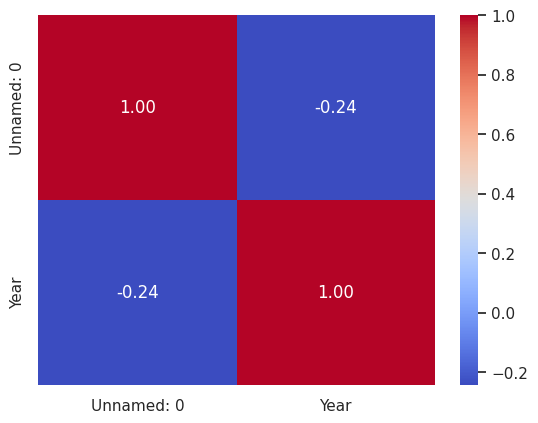

In [ ]:
merged_df
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt = '.2f')

Based on the low correlation coefficient and the high p-value, I can see that the number of MusSkel ER visits in a region does not have a significant relationship to the population in that region

#Highlights from the Data



*   The most common reason that patients visit the ER in Denmark is for musculoskeletal issues

*   There is not a significant difference between male and females in the total number of patient visits

*   When digging deeper into the dataset, however, we do see a difference in when males/females are seeking care, with more males seeking it earlier in life and more females later in life.

*   The highest number of patient visits were for those who were 10-24 years old

*   Region Hovedstaden has by far the largest number of patient visits but the incidence rate based on population is similar to Region Sjælland and Region Syddanmark.

*   The hypothesis testing conducted to determine if gender, age, or location was correlated to number of ER visits showed no signifcant relationship






